In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.6MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalization
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds= validation_ds.map(process)


In [15]:
# CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 112ms/step - loss: 1.1219 - accuracy: 0.5980 - val_loss: 0.6737 - val_accuracy: 0.5948
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.5656 - accuracy: 0.7124 - val_loss: 0.5397 - val_accuracy: 0.7240
Epoch 3/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4815 - accuracy: 0.7711 - val_loss: 0.4900 - val_accuracy: 0.7722
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4157 - accuracy: 0.8144 - val_loss: 0.4466 - val_accuracy: 0.7914
Epoch 5/10
625/625 [==============================] - 71s 112ms/step - loss: 0.3446 - accuracy: 0.8508 - val_loss: 0.8116 - val_accuracy: 0.7470
Epoch 6/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2910 - accuracy: 0.8745 - val_loss: 0.4935 - val_accuracy: 0.7908
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2163 - accuracy: 0.9098 - val_loss: 0.4761 - val_ac

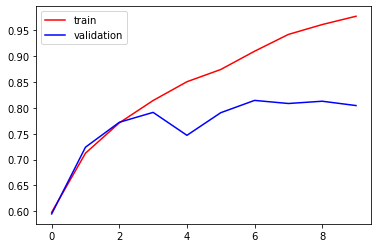

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

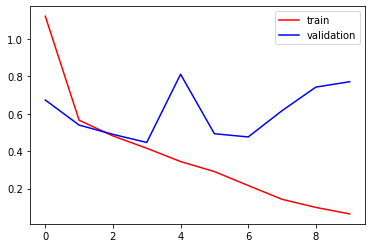

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [41]:
test_img = cv2.imread('/content/download (2).jpg')

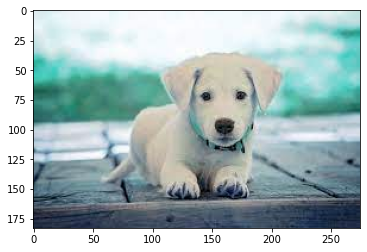

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(183, 275, 3)

In [44]:
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)